# Week 3 - Peer-Graded Assignment

`Author: Andersen Lin`<br><br>
`Date: May 23, 2020`<br><br>
`GitHub:` __[github.com/Andersen1997](https://github.com/Andersen1997)__ <br><br>
`LinkedIn:` __[linkedin.com/in/andersen-lin/](https://www.linkedin.com/in/andersen-lin/)__

<div style="font-size:16px">
<h3><a id = "0"><font color = black>Table of Contents</font></a></h3>
<ol>
    <li><a href = "#1">Part1 (10 marks)</a></li>
    <li><a href = "#2">Part2 (2 marks)</a></li>
    <li><a href = "#3">Part3 (3 marks)</a></li>
</ol>
</div>
<div class="alert alert-block alert-success" style="font-size:16px">
<b>Note:</b> This notebook is mainly used for a weekly project of Applied Data Science Capstone by IBM on Coursera. It is shared on my GitHub repository for peer-to-peer review and grading. 
</div>

<h2><a id = "1">Part1 (10 marks)</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
postal_member = []

res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup = BeautifulSoup(res, "html.parser")

# identify table we want to scrape
postal_table = soup.find('table', {"class" : "wikitable sortable"})

# loop through table, grab each of the 3 columns shown
for row in postal_table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 3:
        postal_member.append((cols[0].text.strip(), cols[1].text.strip(), cols[2].text.strip()))

# assign to a new array
postal_array = np.asarray(postal_member)
len(postal_array)

# convert to a dataframe
df = pd.DataFrame(postal_array)
df.columns = ['PostalCode', 'Borough', 'Neighborhood']
df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,
176,M6Z,Not assigned,
177,M7Z,Not assigned,
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [3]:
# ensure only not assigned cells will be dropped
df['Borough'].describe()

count              180
unique              11
top       Not assigned
freq                77
Name: Borough, dtype: object

In [4]:
# ignore cells whose borough is not assigned
df_assigned = df[df['Borough'] != 'Not assigned'].reset_index(drop = True)
df_assigned

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [5]:
df_assigned['PostalCode'].describe()

count     103
unique    103
top       M5V
freq        1
Name: PostalCode, dtype: object

**Multiple neighborhoods were already combined into one rows on Wiki**

In [6]:
df_assigned[df_assigned.Neighborhood == 'Not assigned']

,PostalCode,Borough,Neighborhood


**There is no neighborhood that is 'Not assigned'**

In [7]:
df_assigned.shape

(103, 3)

***

<h2><a id = "2">Part2 (2 marks)</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

In [8]:
import geocoder

In [9]:
# test if we could get coordinates by the package
g = geocoder.google('Mountain View, CA')
g.latlng

**Could not get information from Geocoder. Import from the csv file instead**

In [10]:
df_coord = pd.read_csv('Geospatial_Coordinates.csv')
df_coord

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


**Ensure the number of unique postal codes in `df_coord` is the same as `df_assigned`**

In [11]:
df_coord['Postal Code'].describe()

count     103
unique    103
top       M5V
freq        1
Name: Postal Code, dtype: object

In [12]:
# merge the two dataframes and drop repeated Postal Code column
df_poscoord = pd.merge(left = df_assigned, right = df_coord, how = 'left', left_on = 'PostalCode', right_on = 'Postal Code')
df_poscoord = df_poscoord.drop(columns = ['Postal Code'])
df_poscoord

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [13]:
df_poscoord.shape

(103, 5)

***

<h2><a id = "3">Part3 (3 marks)</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

In [14]:
df_poscoord['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [15]:
# filter the dataframe to get neighbordhoods in Toronto
df_poscoord = df_poscoord[df_poscoord['Borough'].str.contains("Toronto")].reset_index(drop = True)
df_poscoord.shape

(39, 5)

**There are 39 neighborhoods in Toronto**

In [16]:
import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import webbrowser
from IPython.display import Image

**Use geopy library to get the coordinate of Toronto**

In [17]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent = "ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [18]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_poscoord['Latitude'], df_poscoord['Longitude'], df_poscoord['Borough'], df_poscoord['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_toronto)  
    
map_toronto

In [19]:
# as folium maps will not display on GitHub, save it as an .html file then display
map_toronto.save('before_clustering.html')

In [20]:
# opens a new tab to display the map, will not work on GitHub
webbrowser.open("before_clustering.html")

True

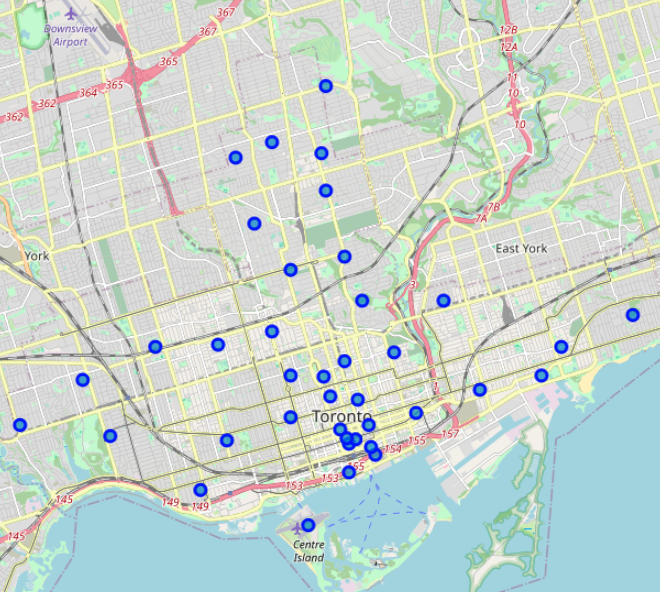

In [21]:
# so I took a screenshot from the new tab and display it here
Image(filename='before_clustering.png') 

**Use the Foursquare API to explore the neighborhoods and segment them**

In [22]:
CLIENT_ID = 'T1NVRT5GLC44RVGSBIJZZQOX3T0RPLG5HUBLAVPGMGVIO2YJ' # your Foursquare ID
CLIENT_SECRET = '3OPOUJLAXJQVHSS5MDSVQFO2IUZIZE4ZWNV54M1ISIGZSB5F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T1NVRT5GLC44RVGSBIJZZQOX3T0RPLG5HUBLAVPGMGVIO2YJ
CLIENT_SECRET:3OPOUJLAXJQVHSS5MDSVQFO2IUZIZE4ZWNV54M1ISIGZSB5F


**Create a function to explore all neighborhoods in Toronto**

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius = 500):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

toronto_venues = getNearbyVenues(names = df_poscoord['Neighborhood'],
                                   latitudes = df_poscoord['Latitude'],
                                   longitudes = df_poscoord['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


In [25]:
# check the size of the resulting dataframe
print(toronto_venues.shape)
toronto_venues.head()

(1605, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [26]:
# check the number of venues returned for each neighborhood
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,62,62,62,62,62,62
Christie,17,17,17,17,17,17
Church and Wellesley,76,76,76,76,76,76
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34


**Find out the number of unique venue categories**

In [27]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


**Analyze each neighborhood**

In [28]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(1605, 235)


,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**There are 1605 venues with 235 different categories**

In [29]:
# group rows by neighborhood and take mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

# confirm that there should be 39 rows
print(toronto_grouped.shape)
toronto_grouped

(39, 235)


,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.00000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,"Business reply mail Processing Centre, South C...",0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.066667,0.066667,0.066667,0.133333,0.133333,0.133333,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,Central Bay Street,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.016129,0.000000,0.000000,0.016129,0.000000,0.00000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,Church and Wellesley,0.026316,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,...,0.013158,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.013158,0.00000
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.000000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.029412,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [30]:
# sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Create a dataframe with the top 10 venues for each neighborhood**

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Cheese Shop,Café,Restaurant,Pub,Shopping Mall
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Nightclub,Bakery,Convenience Store,Bar,Intersection,Italian Restaurant,Restaurant
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Garden Center,Garden,Gym / Fitness Center,Fast Food Restaurant,Farmers Market,Light Rail Station,Comic Shop,Pizza Place
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Coffee Shop,Harbor / Marina,Sculpture Garden,Bar,Airport Gate,Airport Food Court
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Bar,Japanese Restaurant,Ice Cream Shop,Thai Restaurant,Burger Joint,Salad Place


**Cluster neighborhoods**

In [32]:
# set number of clusters
kclusters = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([7, 0, 0, 9, 7, 0, 7, 7, 0, 8], dtype=int32)

In [33]:
# add clustering labels
neighborhoods_venues_cluster = neighborhoods_venues_sorted.copy()
neighborhoods_venues_cluster.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Cheese Shop,Café,Restaurant,Pub,Shopping Mall
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Nightclub,Bakery,Convenience Store,Bar,Intersection,Italian Restaurant,Restaurant
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Garden Center,Garden,Gym / Fitness Center,Fast Food Restaurant,Farmers Market,Light Rail Station,Comic Shop,Pizza Place
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Coffee Shop,Harbor / Marina,Sculpture Garden,Bar,Airport Gate,Airport Food Court
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Bar,Japanese Restaurant,Ice Cream Shop,Thai Restaurant,Burger Joint,Salad Place


In [34]:
neighborhoods_venues_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

In [35]:
toronto_merged = df_poscoord

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_cluster.set_index('Neighborhood'), on = 'Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,7,Coffee Shop,Bakery,Pub,Park,Theater,Breakfast Spot,Café,Shoe Store,Electronics Store,Event Space
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,7,Coffee Shop,Yoga Studio,Sushi Restaurant,Distribution Center,Burrito Place,Japanese Restaurant,Italian Restaurant,Diner,Music Venue,Smoothie Shop
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,7,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Cosmetics Shop,Bubble Tea Shop,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Hotel
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,7,Coffee Shop,Café,Cocktail Bar,American Restaurant,Gastropub,Theater,Restaurant,Department Store,Italian Restaurant,Clothing Store
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,5,Health Food Store,Pub,Trail,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store


In [36]:
# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

In [37]:
# as folium maps will not display on GitHub, save it as an html file then display
map_clusters.save('after_clustering.html')

In [38]:
# opens a new tab to display the map, will not work on GitHub
webbrowser.open("after_clustering.html")

True

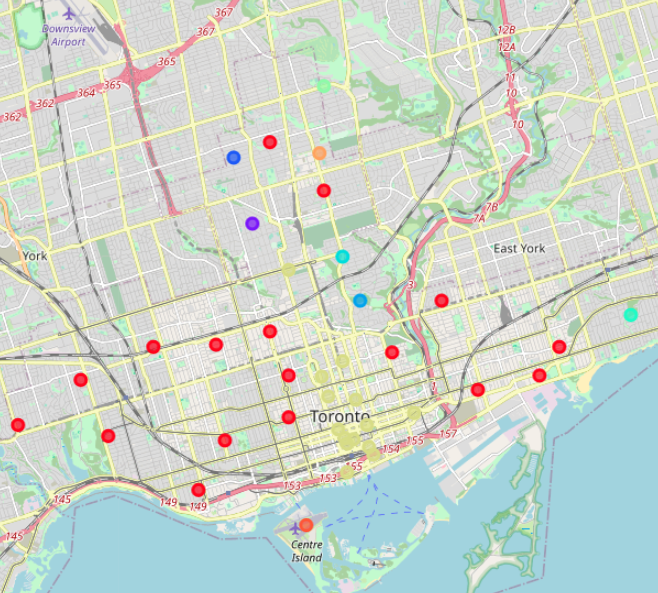

In [39]:
# so I took a screenshot from the new tab and display it here
Image(filename='after_clustering.png') 

**Examine clusters**

* __Cluster 1: Food and Coffee__

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Downtown Toronto,0,Grocery Store,Café,Park,Athletics & Sports,Baby Store,Candy Store,Italian Restaurant,Diner,Restaurant,Coffee Shop
9,West Toronto,0,Pharmacy,Bakery,Park,Café,Middle Eastern Restaurant,Bank,Bar,Pool,Supermarket,Music Venue
11,West Toronto,0,Bar,Restaurant,Asian Restaurant,Men's Store,Vegetarian / Vegan Restaurant,Café,Boutique,Brewery,Record Shop,Pizza Place
12,East Toronto,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Restaurant,Ice Cream Shop,Cosmetics Shop,Brewery,Bubble Tea Shop,Café
14,West Toronto,0,Café,Coffee Shop,Breakfast Spot,Nightclub,Bakery,Convenience Store,Bar,Intersection,Italian Restaurant,Restaurant
15,East Toronto,0,Fast Food Restaurant,Sushi Restaurant,Pub,Sandwich Place,Liquor Store,Italian Restaurant,Burrito Place,Intersection,Restaurant,Ice Cream Shop
17,East Toronto,0,Café,Coffee Shop,Gastropub,American Restaurant,Brewery,Bakery,Latin American Restaurant,Pet Store,Bar,Bookstore
22,West Toronto,0,Bakery,Mexican Restaurant,Café,Thai Restaurant,Park,Bar,Cajun / Creole Restaurant,Speakeasy,Fast Food Restaurant,Arts & Crafts Store
23,Central Toronto,0,Clothing Store,Coffee Shop,Yoga Studio,Chinese Restaurant,Dessert Shop,Salon / Barbershop,Spa,Sporting Goods Shop,Restaurant,Rental Car Location
24,Central Toronto,0,Café,Sandwich Place,Coffee Shop,Pharmacy,Indian Restaurant,Flower Shop,Pub,BBQ Joint,Middle Eastern Restaurant,History Museum


* __Cluster 2: Residential Center__

In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,1,Park,Jewelry Store,Trail,Bus Line,Sushi Restaurant,Deli / Bodega,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


* __Cluster 3: Plaza with a Garden__

In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,2,Garden,Home Service,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


* __Cluster 4: Residential Center with a Playground__

In [43]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Downtown Toronto,3,Park,Playground,Trail,Cupcake Shop,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


* __Cluster 5: Plaza with a Playground__

In [44]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,4,Playground,Summer Camp,Restaurant,Women's Store,Cupcake Shop,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


* __Cluster 6: Home Services__

In [45]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East Toronto,5,Health Food Store,Pub,Trail,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store


* __Cluster 7: Still Home Services__

In [46]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,6,Park,Dim Sum Restaurant,Bus Line,Swim School,Deli / Bodega,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


* __Cluster 8: Coffee Shops__

In [47]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,7,Coffee Shop,Bakery,Pub,Park,Theater,Breakfast Spot,Café,Shoe Store,Electronics Store,Event Space
1,Downtown Toronto,7,Coffee Shop,Yoga Studio,Sushi Restaurant,Distribution Center,Burrito Place,Japanese Restaurant,Italian Restaurant,Diner,Music Venue,Smoothie Shop
2,Downtown Toronto,7,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Cosmetics Shop,Bubble Tea Shop,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Hotel
3,Downtown Toronto,7,Coffee Shop,Café,Cocktail Bar,American Restaurant,Gastropub,Theater,Restaurant,Department Store,Italian Restaurant,Clothing Store
5,Downtown Toronto,7,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Cheese Shop,Café,Restaurant,Pub,Shopping Mall
6,Downtown Toronto,7,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Bar,Japanese Restaurant,Ice Cream Shop,Thai Restaurant,Burger Joint,Salad Place
8,Downtown Toronto,7,Coffee Shop,Café,Restaurant,Deli / Bodega,Clothing Store,Gym,Thai Restaurant,Hotel,Steakhouse,Salad Place
10,Downtown Toronto,7,Coffee Shop,Aquarium,Café,Hotel,Restaurant,Italian Restaurant,Fried Chicken Joint,Sporting Goods Shop,Brewery,Scenic Lookout
13,Downtown Toronto,7,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,American Restaurant,Seafood Restaurant,Italian Restaurant,Salad Place,Sporting Goods Shop
16,Downtown Toronto,7,Coffee Shop,Café,Restaurant,Hotel,American Restaurant,Gym,Seafood Restaurant,Deli / Bodega,Italian Restaurant,Japanese Restaurant


* __Cluster 9: Plaza with a Park__

In [48]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 8, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Central Toronto,8,Park,Department Store,Breakfast Spot,Sandwich Place,Food & Drink Shop,Hotel,Gym,Comic Shop,Donut Shop,Doner Restaurant


* __Cluster 10: Airport Region__

In [49]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 9, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Downtown Toronto,9,Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Coffee Shop,Harbor / Marina,Sculpture Garden,Bar,Airport Gate,Airport Food Court


<h2><a href = "#0" style = "text-decoration:none;">Back to Top ↑</a></h2>